In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from vae.utils import read_cifar_data, read_atari_observations
import numpy as np
import pandas as pd
import os
os.chdir("vae")

In [2]:
# data=read_cifar_data([2])
data=read_atari_observations()

In [3]:
data.shape

(50155, 84, 84, 4)

In [3]:
from VAE import VariationalAutoencoder
vae=VariationalAutoencoder((84,84,4), [(32, 8, 4), (64, 4, 2), (64, 3, 1)],[], 128, 1e-3, use_shared_weights=False)

/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

In [3]:
from AE import Autoencoder
vae=Autoencoder((84,84,4), [(64, 8, 2), (128, 6, 3), (128, 4, 2), (128, 3, 1)], [1000,500], 100, learning_rate=0.0001,  use_shared_weights=False)

/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.

Flattened shape: 1152


WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:33: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:249: The name tf.train.exponential_decay is deprecated. Please use tf.compat.v1.train.exponential_decay instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:251: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:37: The name tf.global_variables_initializer is deprecated. Please use tf.compat.v1.global_variables_initializer instead.

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:39: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



In [6]:
lcurve=pd.read_csv("cost_record.csv")

In [76]:
lcurve_1=pd.read_csv("runs/small CNN, 128/cost_record.csv")

In [77]:
lcurve_2=pd.read_csv("runs/large CNN, 128/cost_record.csv")

In [73]:
lcurve_3=pd.read_csv("runs/small CNN, 64/cost_record.csv")

In [4]:
lcurve_4=pd.read_csv("runs/5e-4decay/cost_record.csv")

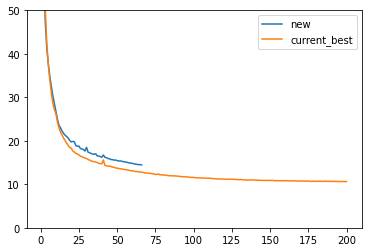

In [7]:
plt.plot(lcurve.Epoch, lcurve["test_cost"],label="new")
# plt.plot(lcurve_1.Epoch, lcurve_1["test_cost"],label="small,128")
# plt.plot(lcurve_2.Epoch, lcurve_2["test_cost"],label="large,128")
# plt.plot(lcurve_3.Epoch, lcurve_3["test_cost"],label="small,64")
plt.plot(lcurve_4.Epoch, lcurve_4["test_cost"],label="current_best")
plt.ylim(0,50)
plt.legend()

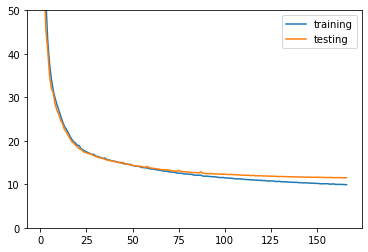

In [7]:
plt.plot(lcurve.Epoch, lcurve["training_cost"],label="training")
plt.plot(lcurve.Epoch, lcurve["test_cost"],label="testing")
plt.ylim(0,50)
plt.legend()

In [4]:
vae.load_model("runs/5e-4decay/model")

WARNING - From /data2/jerry/cs285_final_proj/cs285_project/vae/AE.py:64: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

WARNING - From /home/jerry/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


In [8]:
new_data=np.load("../baselines/rnd_gail/some_obs.npy")

In [9]:
new_data.shape

(84, 84, 4)

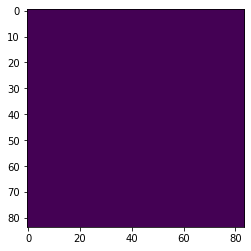

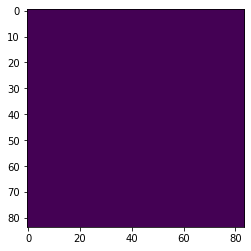

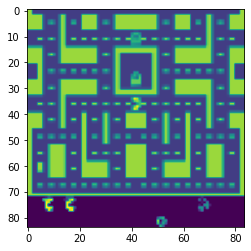

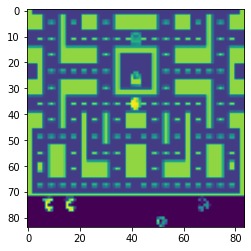

In [12]:
plt.figure()
plt.imshow(new_data[:,:,0])
plt.figure()
plt.imshow(new_data[:,:,1])
plt.figure()
plt.imshow(new_data[:,:,2])
plt.figure()
plt.imshow(new_data[:,:,3])

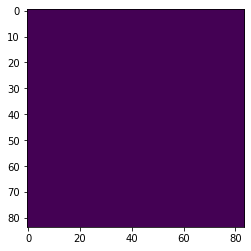

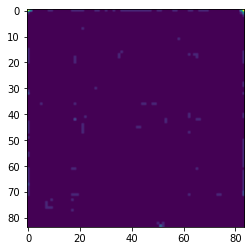

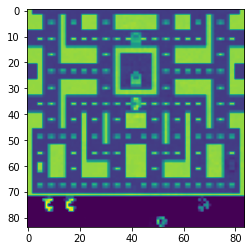

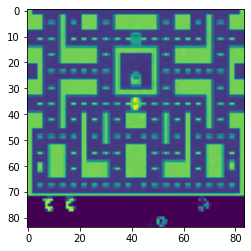

In [24]:
plt.figure()
plt.imshow(rec[:,:,0])
plt.figure()
plt.imshow(rec[:,:,1])
plt.figure()
plt.imshow(rec[:,:,2])
plt.figure()
plt.imshow(rec[:,:,3])

In [25]:
enc=vae.encode(new_data[None]/255)

In [26]:
enc

array([[-1.3633999e-01, -7.7780508e-02, -2.3971606e-02, -1.5999953e-01,
        -1.6187938e-01,  3.1480696e-02,  2.2785801e-02, -8.7715283e-02,
         1.4355123e-02, -5.1384319e-02, -6.1409324e-02,  5.4031387e-02,
        -1.4736381e-01,  2.1399781e-01,  1.7455897e-01, -3.8921311e-03,
        -5.6595780e-02, -8.6660251e-02,  9.2388600e-02, -8.5154831e-02,
        -3.2020766e-01, -1.3125487e-02,  1.3778108e-01, -7.0657074e-02,
        -1.9293967e-01, -1.1046482e-01,  9.6246228e-04,  2.3326294e-01,
        -5.0734043e-02, -1.6077507e-01, -1.9414042e-01,  2.7701163e-01,
        -5.7616398e-02,  9.6924350e-02,  3.6050726e-02, -1.2043393e-01,
        -3.2454204e-02, -6.6081442e-02,  4.6899460e-02,  1.5147783e-01,
        -6.6498078e-02, -3.1707695e-01, -8.7825850e-02, -4.2682812e-03,
        -8.2464069e-02, -2.9332608e-01,  1.9042268e-03,  1.6839776e-02,
         1.0189818e-01, -1.6224468e-01, -6.6361509e-02, -3.9630089e-02,
        -7.7398770e-02, -7.9556890e-02,  1.2842645e-01,  9.85356

In [23]:
rec=np.array(vae.reconstruct(new_data[None]/255)*255,np.uint8)[0]

In [21]:
rec

array([[[[  0,   8, 144, 145],
         [  0,   4, 144, 145],
         [  0,   0,  29,  30],
         ...,
         [  0,   0,  30,  33],
         [  0,   4, 144, 146],
         [  0,   9, 142, 147]],

        [[  0,   1, 144, 144],
         [  0,   0, 145, 145],
         [  0,   0,  31,  31],
         ...,
         [  0,   0,  31,  30],
         [  0,   1, 146, 144],
         [  0,   4, 145, 145]],

        [[  0,   0, 145, 145],
         [  0,   0, 144, 144],
         [  0,   0, 144, 144],
         ...,
         [  0,   0, 146, 144],
         [  0,   0, 145, 144],
         [  0,   1, 145, 145]],

        ...,

        [[  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         ...,
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0]],

        [[  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         ...,
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         

In [5]:
selected_data=data[np.random.randint(0,10000,size=18)]
rec=np.array(vae.reconstruct(selected_data/255)*255,np.uint8)
sbs_original=np.moveaxis(np.array([selected_data,rec]),(0,1,-1),(1,0,2))
sbs=sbs_original.reshape((-1,)+data.shape[1:-1])

In [6]:
enc=vae.encode(selected_data/255)

(array([  1.,   3.,   0.,   2.,   3.,  10.,  21.,  94., 200., 391., 431.,
        331., 208.,  75.,  21.,   6.,   1.,   1.,   0.,   1.]),
 array([-1.3683493 , -1.237818  , -1.1072867 , -0.9767553 , -0.846224  ,
        -0.71569264, -0.5851613 , -0.45463002, -0.32409868, -0.19356735,
        -0.06303602,  0.0674953 ,  0.19802663,  0.32855797,  0.45908928,
         0.5896206 ,  0.72015196,  0.8506833 ,  0.9812146 ,  1.111746  ,
         1.2422773 ], dtype=float32),
 <BarContainer object of 20 artists>)

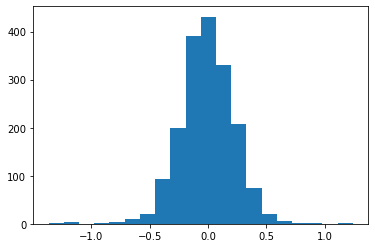

In [7]:
plt.hist(enc.flatten(),bins=20)

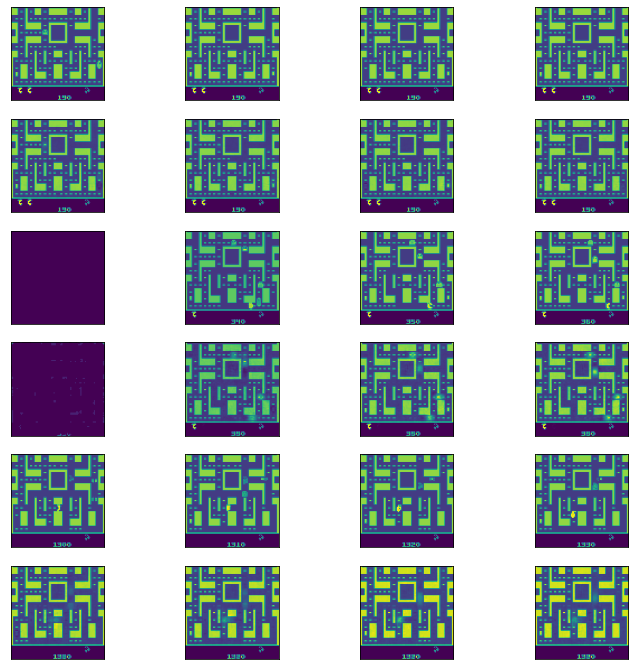

In [62]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, idx in zip(axs.flat, range(36)):
    ax.imshow(sbs[idx])


# plt.tight_layout()

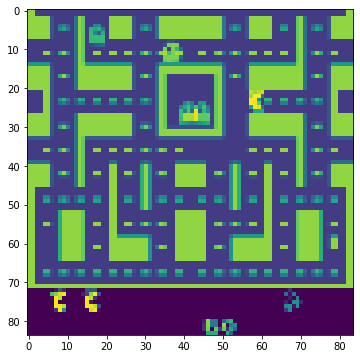

In [57]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[8][0][3])

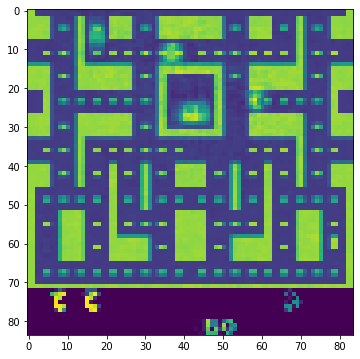

In [58]:
plt.figure(figsize=(6,6))
plt.imshow(sbs_original[8][1][3])